In [1]:
### Glassdoor Data Scientist Job Data 

# import modules
import pandas as pd
import os
import scipy.stats as st
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
# load dataset
glassdoor = pd.read_csv("glassdoor_data_scientist_jobs.csv")

In [3]:
# check header
glassdoor.head(10)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
5,5,5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,"Colony Specialty, Markel, RLI",-1
6,6,6,Quantitative Researcher,$111K-$181K (Glassdoor est.),Experience: Entry-level (PhD Program) or Exper...,4.4,PDT Partners\n4.4,"New York, NY","New York, NY",51 to 200 employees,1993,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
7,7,7,Quantitative Research Associate,$111K-$181K (Glassdoor est.),Seeking a quant to work with senior researcher...,-1.0,Enlightenment Research,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE
8,8,8,AI Scientist,$111K-$181K (Glassdoor est.),Paige is a software company helping pathologis...,5.0,Paige\n5.0,"New York, NY","New York, NY",1 to 50 employees,2018,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,TRUE
9,9,9,Quantitative Researcher,$111K-$181K (Glassdoor est.),"About the Position\n\n\nAt Jane Street, we con...",4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1


In [4]:
# check tail
glassdoor.tail(10)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3899,3899,4370,Sr Data Analyst,$55K-$112K (Glassdoor est.),Sr Data Analyst\n\n\nJob Description\n\nCFS Te...,4.5,Creative Financial Staffing\n4.5,"Westerville, OH","Boston, MA",201 to 500 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD),"Robert Half, Kforce",-1
3900,3900,4371,Big Data Engineer,$55K-$112K (Glassdoor est.),"ICS is working with a Fortune 500, industry le...",3.4,Infinity Consulting Solutions\n3.4,"Columbus, OH","New York, NY",501 to 1000 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"The Judge Group, Addison Group, PageGroup",-1
3901,3901,4372,Principal Data Engineer,$55K-$112K (Glassdoor est.),ComResource is looking for a Principal Data En...,4.6,ComResource\n4.6,"Columbus, OH","Columbus, OH",201 to 500 employees,1991,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
3902,3902,4373,Columbus Data Science Tutor Jobs,$55K-$112K (Glassdoor est.),#Columbus Data Science Tutor Jobs\n\nVarsity T...,4.2,Varsity Tutors\n4.2,"Columbus, OH","Saint Louis, MO",201 to 500 employees,2007,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,-1
3903,3903,4374,Cyber Security Data Engineer,$55K-$112K (Glassdoor est.),ApTask is a leading staffing and recruitment c...,3.9,ApTask\n3.9,"Dublin, OH","Iselin, NJ",201 to 500 employees,2010,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),"Collabera, Mitchell Martin, The Judge Group",-1
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1
3908,3908,4379,Patient Safety Physician or Safety Scientist -...,$55K-$112K (Glassdoor est.),"Help us transform patients' lives.\nAt UCB, we...",3.7,UCB\n3.7,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,-1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),AbbVie,-1


In [5]:
# data types
glassdoor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [6]:
# column titles
glassdoor.columns

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

In [7]:
# remove unneeded columns
glassdoor.drop('Unnamed: 0', axis=1, inplace=True)
glassdoor.drop('index', axis=1, inplace=True)
glassdoor.drop('Salary Estimate', axis=1, inplace=True)
glassdoor.drop('Rating', axis=1, inplace=True)
glassdoor.drop('Company Name', axis=1, inplace=True)
glassdoor.drop('Location', axis=1, inplace=True)
glassdoor.drop('Headquarters', axis=1, inplace=True)
glassdoor.drop('Size', axis=1, inplace=True)
glassdoor.drop('Founded', axis=1, inplace=True)
glassdoor.drop('Type of ownership', axis=1, inplace=True)
glassdoor.drop('Revenue', axis=1, inplace=True)
glassdoor.drop('Competitors', axis=1, inplace=True)
glassdoor.drop('Easy Apply', axis=1, inplace=True)
glassdoor.drop('Industry', axis=1, inplace=True)
glassdoor.drop('Sector', axis=1, inplace=True)
glassdoor.head()

,Job Title,Job Description
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ..."
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ..."
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...
4,"Director, Data Science","Director, Data Science - (200537)\nDescription..."


In [8]:
job_title_df = glassdoor.loc[
    (glassdoor["Job Description"].str.contains("Excel", case=False)) |
    (glassdoor["Job Description"].str.contains("Python", case=False)) |
    (glassdoor["Job Description"].str.contains("SQL", case=False)) |
    (glassdoor["Job Description"].str.contains("Tableau", case=False)) |
    (glassdoor["Job Description"].str.contains("Machine Learning", case=False))
]
job_title_df.to_csv('glassdoor_clean.csv', index=False)

In [9]:
# load clean dataset
glassdoor_clean = pd.read_csv("glassdoor_clean.csv")

In [10]:
# check clean header
glassdoor_clean.head(10)

,Job Title,Job Description
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ..."
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ..."
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...
4,"Director, Data Science","Director, Data Science - (200537)\nDescription..."
5,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...
6,Quantitative Researcher,Experience: Entry-level (PhD Program) or Exper...
7,AI Scientist,Paige is a software company helping pathologis...
8,Data Scientist,Company Description:\n\nQuartet is a pioneerin...
9,Data Scientist/Machine Learning,"PulsePoint™, a global programmatic advertising..."


In [11]:
# check clean tail
glassdoor_clean.tail(10)

,Job Title,Job Description
3375,Senior/Principal Scientist - Display Technolog...,"Help us transform patients' lives.\n\nAt UCB, ..."
3376,Senior Data Engineer (Data ELT/ETL Engineer),Find a career. Gain a family.\n\nSafelite will...
3377,Senior Data Engineer,Job Responsibility:\nBased on business strateg...
3378,Sr Data Analyst,Sr Data Analyst\n\n\nJob Description\n\nCFS Te...
3379,Big Data Engineer,"ICS is working with a Fortune 500, industry le..."
3380,Cyber Security Data Engineer,ApTask is a leading staffing and recruitment c...
3381,Data Analyst â Junior,"Job description\nInterpret data, analyze resul..."
3382,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Eng...
3383,Security Analytics Data Engineer,The Security Analytics Data Engineer will inte...
3384,Patient Safety Physician or Safety Scientist -...,"Help us transform patients' lives.\nAt UCB, we..."


In [12]:
# job title types
job_title = glassdoor["Job Title"].value_counts()
job_title = job_title[:20]
job_title

Data Scientist                                                   274
Data Engineer                                                    260
Data Analyst                                                     246
Senior Data Scientist                                             91
Senior Data Analyst                                               47
Machine Learning Engineer                                         47
Big Data Engineer                                                 41
Business Intelligence Analyst                                     39
Senior Data Engineer                                              37
Lead Data Scientist                                               23
Sr. Data Scientist                                                23
Research Scientist                                                22
Data Modeler                                                      17
Principal Data Scientist                                          15
Junior Data Analyst               

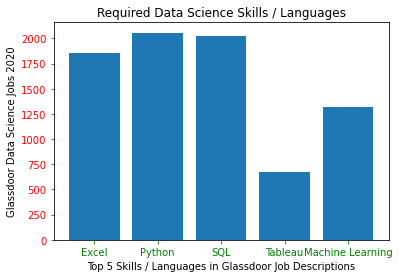

In [13]:
# create bar graph for jobs with relevant job skills
keywords = [
    "Excel",
    "Python",
    "SQL",
    "Tableau",
    "Machine Learning"
]

x_axis = keywords
y_axis = []

for keyword in keywords:
    key_word_df = job_title_df.loc[job_title_df["Job Description"].str.contains(keyword, case=False)]
    number_of_values = len(key_word_df)
    y_axis.append(number_of_values)
    
plt.bar(x_axis, y_axis)
plt.xlabel("Top 5 Skills / Languages in Glassdoor Job Descriptions")
plt.ylabel("Glassdoor Data Science Jobs 2020")
plt.title("Required Data Science Skills / Languages")

# set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='red')

plt.show()

In [14]:
# search for code language keyword "Entry"
glassdoor_clean.loc[glassdoor_clean["Job Description"].str.contains("Entry", case=False)]

,Job Title,Job Description
6,Quantitative Researcher,Experience: Entry-level (PhD Program) or Exper...
76,"Data Scientist, Analytics- Instagram-Family St...",Facebook's mission is to give people the power...
135,Data Analyst,"Whip Media Group's products, including Mediamo..."
173,Data Scientist,Company Description\n\nWisestep is the fastest...
258,Senior Data Scientist,"Senior Data Scientist\n\nMunich Re, New York, ..."
285,Data Analyst,Data Analyst\n\nTeaching at Hyde Leadership Ch...
313,Data Scientist,"Data Scientist | AcornsAt Acorns, we're buildi..."
341,Data Scientist,Our entertainment company is seeking a Data Sc...
424,"Environmental Scientists, Geologists, or Envir...",Work for an Industry Leader\nChallenging Proje...
487,"Scientist 2, Data Analytics","Areté Associates seeks highly motivated, techn..."


In [15]:
# search for code language keyword "Certification"
glassdoor_clean.loc[glassdoor_clean["Job Description"].str.contains("Certification", case=False)]

,Job Title,Job Description
155,Data Analyst,Job Description\nThe New York City Department ...
249,Senior Data Scientist,Job Description\nCompany Description\n\nJob ti...
265,Information Systems Officer (Data Analyst),Org. Setting and Reporting\n\nThe United Natio...
268,Sr Data Scientist,Senior Data Scientist Description The Senior D...
289,Senior Data Scientist,"Senior Data Scientist\n\nNewark, NJ, United St..."
291,Data Engineer,About Freestar:\n\nFreestar engineers cutting-...
302,Senior Data Scientist,Job Description\nTitle: Senior Data Scientist\...
354,Data Analyst I,Data Analyst I\n\nJob Category:\n\nInformation...
374,Data Scientist II,Data Scientist II\n\nJob Category:\n\nInformat...
388,Machine Learning Engineer,OVERVIEW OF THE COMPANY\nFox Corporation\nUnde...


In [16]:
# search for code language keyword "Degree"
glassdoor_clean.loc[glassdoor_clean["Job Description"].str.contains("Degree", case=False)]

,Job Title,Job Description
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ..."
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...
5,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...
7,AI Scientist,Paige is a software company helping pathologis...
...,...,...
3377,Senior Data Engineer,Job Responsibility:\nBased on business strateg...
3379,Big Data Engineer,"ICS is working with a Fortune 500, industry le..."
3382,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Eng...
3383,Security Analytics Data Engineer,The Security Analytics Data Engineer will inte...


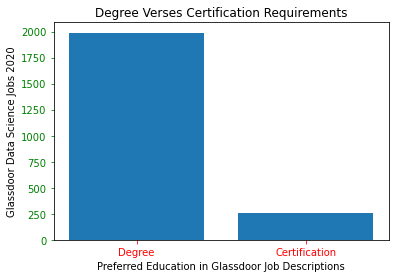

In [17]:
# create bar graph for degree vs certification
keywords = [
    "Degree",
    "Certification"
]
  
x_axis = keywords
y_axis = []

for keyword in keywords:
    key_word_df = job_title_df.loc[job_title_df["Job Description"].str.contains(keyword, case=False)]
    number_of_values = len(key_word_df)
    y_axis.append(number_of_values)
    
plt.bar(x_axis, y_axis)
plt.xlabel("Preferred Education in Glassdoor Job Descriptions")
plt.ylabel("Glassdoor Data Science Jobs 2020")
plt.title("Degree Verses Certification Requirements")

# set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='green')